See the parent `Santorini_volcano.ipynb` notebook.

#### Notebook config

In [20]:
# %load ../../software/fullwavepy/fullwavepy/config/jupyter.py 
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot', 'kmc_test'])
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(INFO) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2

Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


Let us define a path on a cx1 cluster where heavy output will be saved.

In [21]:
path_eph = '/home/kmc3817/rds_home/my_ephemeral/PROJECTS/'

It is handy to have a 'digital twin' of a seismic experiment.

In [25]:
# from fullwavepy.seismic.experiments import PROTEUS
# exp = PROTEUS()
from fullwavepy.ioapi.proteus import ProteusExperiment
exp = ProteusExperiment()
exp

# Data subset

## Model box

#### Tab.
`b01` -- box of the study area.

CPU times: user 52 ms, sys: 8 ms, total: 60 ms
Wall time: 55.2 ms


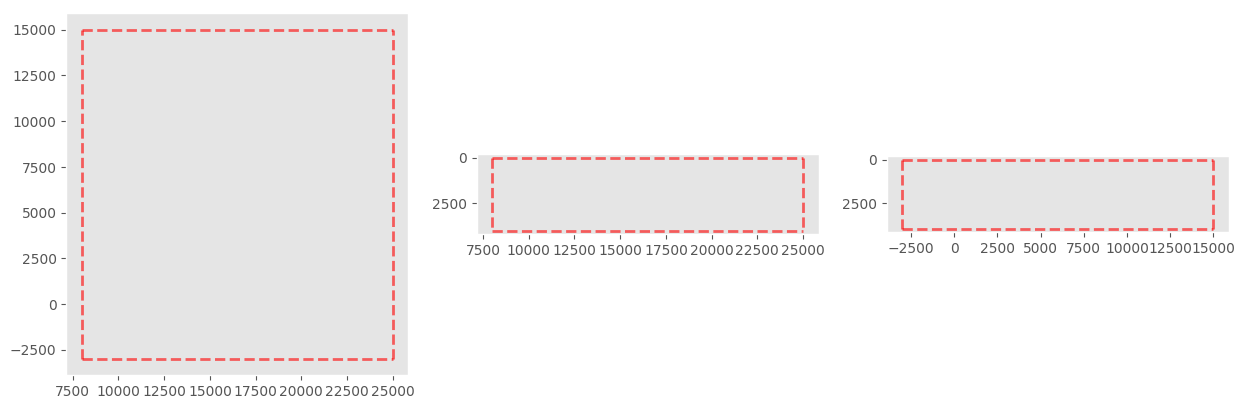

In [26]:
%%time 
from fullwavepy.utils import Box
from fullwavepy.plot.generic import figax
# in metres 
x1 = +8.0e3
x2 = +2.5e4   
y1 = -3.0e3   
y2 = +1.5e4    
z1 = 0
z2 = +4.0e3
b01 = Box(x1, x2, y1, y2, z1, z2)
fig, ax = figax()
b01.plot() # lacks units

#### Fig.
Topographic map of the study area.

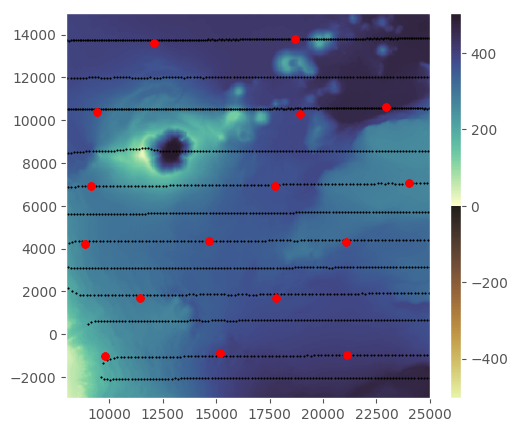

In [27]:
# code 
box = b01
import cmocean.cm as cm
topo = Arr3d(exp.bathytopo).slice(slice_at='z')
topo.dx = [50.,50.]
topo = topo.carve(box.box[:-2])
topo.extent[1] = topo.extent[1][::-1] # FIXME
figure(8,5)
ax = topo.plot(cmap=[cm.turbid, cm.deep], center_cmap=1, aspect='equal')

md = exp.md.read(overwrite=False)
df = md[md.tracf==md.iloc[0].tracf]
plt.scatter(df.sx, df.sy, c='k', s=1)
df = md[md.tracf==md.iloc[0].tracf]
plt.scatter(md[md.fldr==9882].gx, md[md.fldr==9882].gy, c='r', s=30)
plt.xlim(box.box[:2])
_ = plt.ylim(box.box[2:4])

## Data selection

In [10]:
b01.extent

[[8000.0, 25000.0], [-3000.0, 15000.0], [0, 4000.0]]

In [23]:
lll(40)
p1 = ProjSyn('kol_dat01', path='proj', dt=0.001, ns=1000, dx=50, dims=(101,1,41), cat=0)
# Create a text file with names of files storing raw data
# p1.i.rse.create(['../../../data/all_hy_traces_in_x8000_25000_y-3000_15000_box-OutSeis.sgy'])
# p1.i.rse.cat()

In [12]:
a = A3d('data/p14-StartVp_shape341x361x81.mmp', shape=(341,361,81), extent=b01.extent)

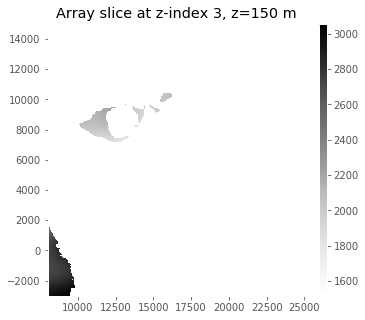

In [15]:
fig, ax = figax(15,5)
_ = a.plot(150, axis='z', unit='m', aspect='e')

In [42]:
# p1.i.tvp.create()

In [34]:
!ls data

all_hy_traces_in_x8000_25000_y-3000_15000_box-OutSeis.sgy
bt_kol01_shape341x361.mmp
klaver2016_Kolumbo.csv
p14-CP00040-Vp_shape341x361x81.mmp
p14-CP00080-Vp_shape341x361x81.mmp
p14-StartVp_shape341x361x81.mmp
ueki_uwamori2016_Kolumbo.xlsx


In [14]:
from fullwavepy.ioapi.proteus import ProteusExperiment
pro = ProteusExperiment()

In [17]:
pro.path['data']

'/home/kmc3817/heavy_PhD/DATA/Santorini_2015/'

In [21]:
pro.dataset['obshy']['101'].path

'/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords/'

In [24]:
pro.dataset['obshy']['101']

In [23]:
!ls {pro.dataset['obshy']['101'].path}

binary				   MGL1521_S166_1.sgy
header				   MGL1521_S166_4_HEAD.csv
LOCATION_AUK.txt		   MGL1521_S166_4_HEAD.json
metadata_1.json			   MGL1521_S166_4.sgy
metadata_4.json			   MGL1521_S167_1_HEAD.csv
metadata.csv			   MGL1521_S167_1_HEAD.json
metadata.json			   MGL1521_S167_1.sgy
metadata_lighter.json		   MGL1521_S167_4_HEAD.csv
MGL1521_S101_1_HEAD.csv		   MGL1521_S167_4_HEAD.json
MGL1521_S101_1_HEAD.json	   MGL1521_S167_4.sgy
MGL1521_S101_1.sgy		   MGL1521_S168_1_HEAD.csv
MGL1521_S101_1_windowed.mmp	   MGL1521_S168_1_HEAD.json
MGL1521_S101_1_windowed.sgy	   MGL1521_S168_1.sgy
MGL1521_S101_1_windowed.vtr	   MGL1521_S168_4_HEAD.csv
MGL1521_S101_4_HEAD.csv		   MGL1521_S168_4_HEAD.json
MGL1521_S101_4_HEAD.json	   MGL1521_S168_4.sgy
MGL1521_S101_4.sgy		   MGL1521_S169_1_HEAD.csv
MGL1521_S101_4_taper_pad_filt.sgy  MGL1521_S169_1_HEAD.json
MGL1521_S101_4_taper_pad.sgy	   MGL1521_S169_1.sgy
MGL1521_S101_4_taper.sgy	   MGL1521_S169_4_HEAD.csv
MGL1521_S101_4_windowed.mmp	   MGL1521_S169_4_HEAD.

# Processing

#### Tab.
Data-processing parameters.

In [24]:
kw_filt = {'pad': 100, 'f1': 2, 'f2': 3, 'f3': 4.5, 'f4': 6.5, 'zerophase': False}

# ...